In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('Housing (1).csv')

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
housing["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


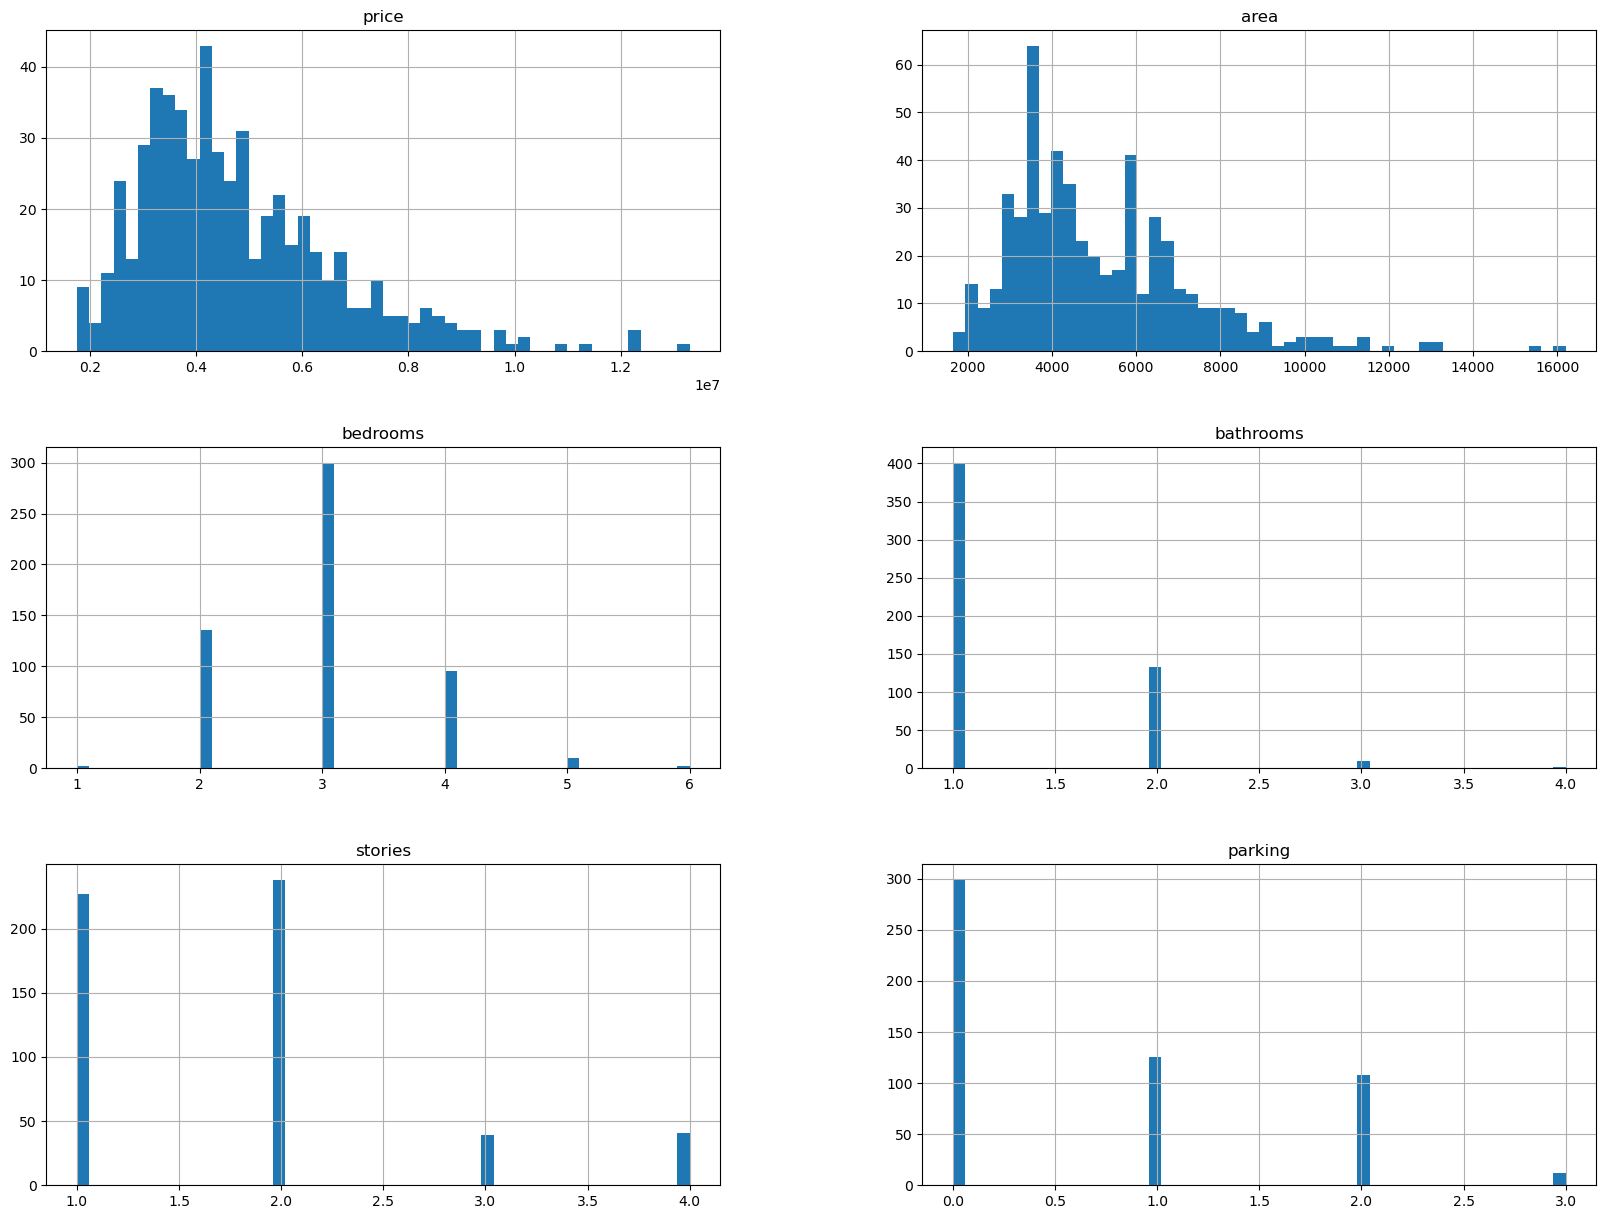

In [7]:
housing.hist(bins = 50, figsize = (20,15))
plt.show()

In [18]:
data = housing

In [19]:
data['mainroad'] = data['mainroad'].replace({'yes':1,'no':0}).astype(int)
data['guestroom'] = data['guestroom'].replace({'yes':1,'no':0}).astype(int)
data['basement'] = data['basement'].replace({'yes':1,'no':0}).astype(int)
data['hotwaterheating'] = data['hotwaterheating'].replace({'yes':1,'no':0}).astype(int)
data['airconditioning'] = data['airconditioning'].replace({'yes':1,'no':0}).astype(int)
data['prefarea'] = data['prefarea'].replace({'yes':1,'no':0}).astype(int)
data['furnishingstatus'] = data['furnishingstatus'].replace({'furnished':2,'semi-furnished':1, 'unfurnished':0 }).astype(int)

In [20]:
corr = data.corr()
corr

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_cat
price,1.000000,0.518666,0.375640,0.555899,0.422540,0.272221,0.272170,0.163505,0.092823,0.460662,0.407808,0.274523,0.333758,0.515108
area,0.518666,1.000000,0.145683,0.219765,0.075774,0.274594,0.130046,0.012325,-0.046326,0.243272,0.345111,0.187731,0.169250,0.916333
bedrooms,0.375640,0.145683,1.000000,0.374512,0.424161,-0.056918,0.076996,0.060670,0.080684,0.163318,0.127853,0.045389,0.147140,0.136181
bathrooms,0.555899,0.219765,0.374512,1.000000,0.351875,0.025973,0.107766,0.047520,0.057363,0.188790,0.187273,0.039358,0.149283,0.205127
stories,0.422540,0.075774,0.424161,0.351875,1.000000,0.080596,0.035235,-0.184048,0.020657,0.267309,0.032052,0.034431,0.141851,0.096740
mainroad,0.272221,0.274594,-0.056918,0.025973,0.080596,1.000000,0.093427,0.018448,-0.052369,0.091257,0.190608,0.181224,0.167679,0.283856
guestroom,0.272170,0.130046,0.076996,0.107766,0.035235,0.093427,1.000000,0.382257,-0.014113,0.151037,0.022541,0.154858,0.116308,0.153762
basement,0.163505,0.012325,0.060670,0.047520,-0.184048,0.018448,0.382257,1.000000,0.026052,0.025874,0.027377,0.209768,0.105497,0.056428
hotwaterheating,0.092823,-0.046326,0.080684,0.057363,0.020657,-0.052369,-0.014113,0.026052,1.000000,-0.124374,0.051650,-0.065818,-0.008231,-0.042542
airconditioning,0.460662,0.243272,0.163318,0.188790,0.267309,0.091257,0.151037,0.025874,-0.124374,1.000000,0.179081,0.108930,0.164293,0.272588


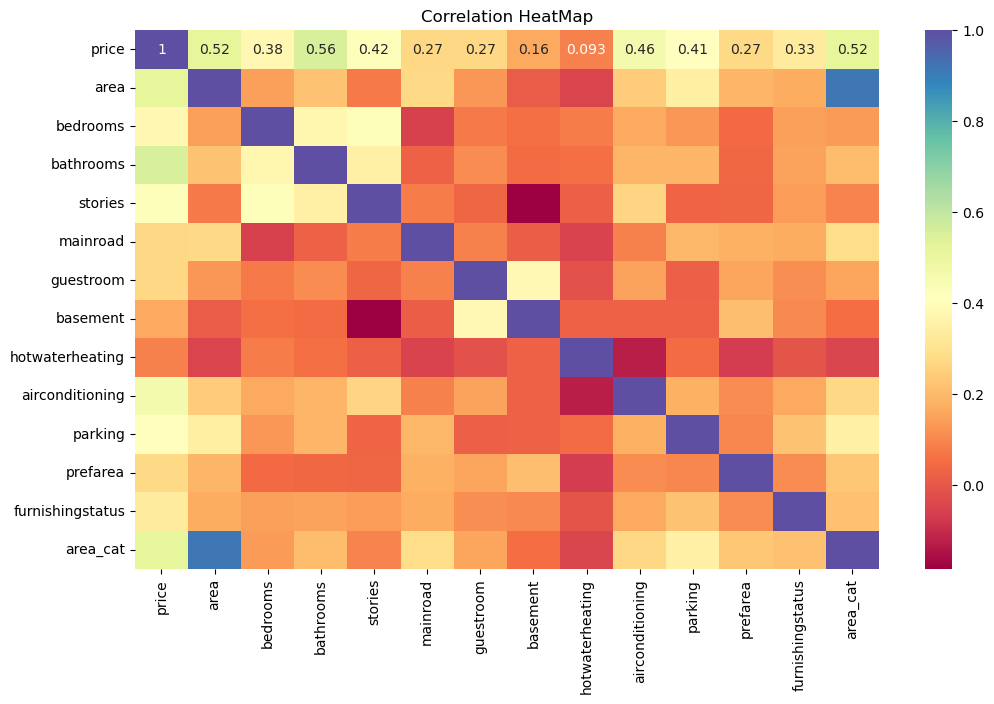

In [21]:
import seaborn as sns
price_corr = data.corr()
plt.figure(figsize= (12,7))
sns.heatmap(price_corr,annot = True,  cmap='Spectral')
plt.title('Correlation HeatMap')
plt.show()

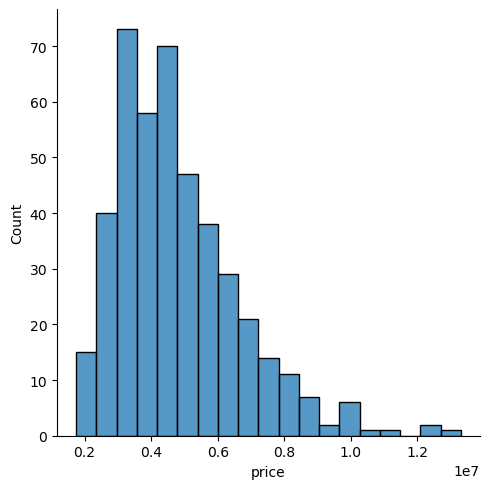

In [23]:
import warnings
warnings.filterwarnings("ignore")
sns.displot(data['price'])

<Axes: >

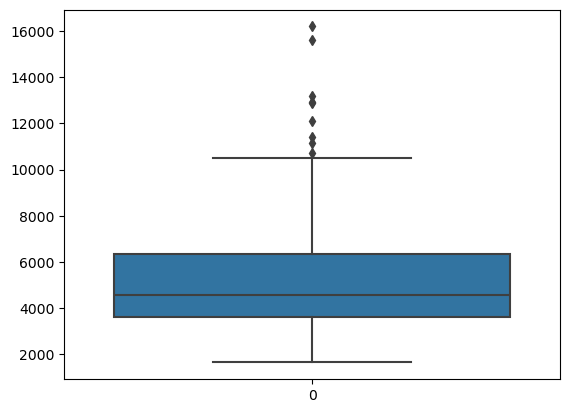

In [24]:
sns.boxplot(data['area'])

In [25]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

IQR, Q1, Q3

(2325750.0, 3456250.0, 5782000.0)

In [26]:
upper_bound = Q3 + 3 * IQR
lower_bound = Q1 - 3 * IQR

upper_bound, lower_bound
data = data[(data['price'] <= upper_bound) & (data['price'] >=  lower_bound)]

In [27]:
Q1_area = data['area'].quantile(0.25)
Q3_area = data['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

IQR_area, Q1_area, Q3_area

(2760.0, 3600.0, 6360.0)

In [28]:
upper_bound_area = Q3_area + 3 * IQR_area
lower_bound_area = Q1_area - 3 * IQR_area

upper_bound_area, lower_bound_area
data = data[(data['area'] <= upper_bound_area) & (data['area'] >=  lower_bound_area)]

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [30]:
x = data.drop(['price'], axis = 1)
y = data['price']

In [31]:
scalar = StandardScaler()

x_scale = scalar.fit_transform(x)

In [32]:
random = RandomForestRegressor()
reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x_scale,y, test_size= 0.2 , random_state=2)

In [33]:
reg.fit(x_train,y_train)
random.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
y_pred_random = random.predict(x_test)
y_pred_reg = reg.predict(x_test)

In [35]:
# Evaluation for Linear Regression

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_reg))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg)))

MAE: 901313.7497810285
MSE: 1524092149873.342
RMSE: 1234541.2710287746


In [36]:
# Linear Regression Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_reg)

0.6259857632214585

In [37]:
# Random Forest Regressor Score
r2_score(y_test, y_pred_random)

0.5441736659950618